# Libraries import

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
file_path = "dataset/online_retail_II.xlsx"

# each sheet is for a different year
df1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# Combine both years into one DataFrame
df = pd.concat([df1, df2], ignore_index=True)

In [3]:
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [32]:
print("\nDuplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate Rows: 34335


In [33]:
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64


In [34]:
df[df['Description'].isnull()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


In [35]:
# Create a mapping from StockCode to Description
code_to_name = df.dropna(subset=['Description']).drop_duplicates('StockCode').set_index('StockCode')['Description']

# Fill missing descriptions based on StockCode
df['Description'] = df.apply(
    lambda x: code_to_name[x['StockCode']] if pd.isnull(x['Description']) and x['StockCode'] in code_to_name else x['Description'],
    axis=1
)


In [36]:
df['Description'].isnull().sum()

np.int64(363)

In [37]:
df.shape

(1033036, 8)

In [38]:
df[df['Description'].isnull()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
16186,490736,35983,NaN,-200,2009-12-07 17:13:00,0.0,NaN,United Kingdom
19313,490976,84571,NaN,-120,2009-12-08 16:42:00,0.0,NaN,United Kingdom
20975,491066,35949,NaN,-67,2009-12-09 12:17:00,0.0,NaN,United Kingdom
22854,491167,17013A,NaN,-45,2009-12-10 11:09:00,0.0,NaN,United Kingdom


In [39]:
df[df['Quantity'] < 0].shape


(22496, 8)

In [40]:
df[df['Quantity'] < 0][['Customer ID', 'Price']].isnull().sum()


Customer ID    4106
Price             0
dtype: int64

In [41]:
df[df['Quantity'] < 0]['Price'].value_counts()

Price
0.00       3393
1.25       1593
2.95       1372
1.65       1280
4.95       1163
           ... 
39.70         1
5.50          1
606.00        1
2185.04       1
224.69        1
Name: count, Length: 1006, dtype: int64

In [42]:
# Returns dataset (negative quantity or zero price)
df_returns = df[(df['Quantity'] < 0) | (df['Price'] == 0)]

# Sales dataset (valid sales only)
df_sales = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [18]:
df_returns

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
df_sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [20]:
# Top 10 most returned products
df_returns['Description'].value_counts().head(10)

# Total quantity returned by product
returns_summary = (
    df_returns.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=True)  # Negative quantities
)
returns_summary.head(10)


Description
PAPER CRAFT , LITTLE BIRDIE      -80995
MEDIUM CERAMIC TOP STORAGE JAR   -74494
given away                       -26400
?                                -26064
printing smudges/thrown away     -19200
missing                          -16467
Unsaleable, destroyed.           -15644
ebay sales                       -13630
check                            -12057
Given away                       -10200
Name: Quantity, dtype: int64

In [22]:
df_returns = df[df['Quantity'] < 0].copy()

df_returns['Return_Reason'] = df_returns['Description'].apply(lambda x:
    'Damaged/Defective' if 'smudge' in str(x).lower() or 'unsaleable' in str(x).lower()
    else 'Given Away' if 'given away' in str(x).lower()
    else 'Lost/Missing' if 'missing' in str(x).lower()
    else 'Other'
)


In [23]:
df_returns.groupby('Return_Reason')['Quantity'].sum()


Return_Reason
Damaged/Defective    -45583
Given Away           -36600
Lost/Missing         -23785
Other               -940166
Name: Quantity, dtype: int64

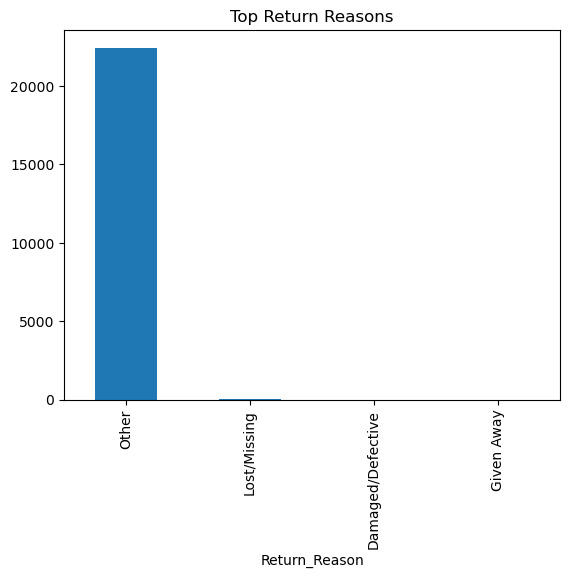

In [24]:
import matplotlib.pyplot as plt
df_returns['Return_Reason'].value_counts().plot(kind='bar', title='Top Return Reasons')
plt.show()


In [25]:
other_returns = df_returns[df_returns['Return_Reason'] == 'Other']
other_returns.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return_Reason
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,Other
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,Other
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,Other
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,Other
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,Other
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,Other
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,Other
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia,Other
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,Other
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom,Other


In [26]:
# Export all return data to Excel
df_returns.to_excel("returns_data.xlsx", index=False)
print("✅ Returns data saved as 'returns_data.xlsx'")


✅ Returns data saved as 'returns_data.xlsx'


# sales analysis

In [43]:
df_sales = df[df['Quantity'] > 0].copy()
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])
daily_sales = df_sales.groupby(df_sales['InvoiceDate'].dt.date)['Quantity'].sum()
daily_sales = daily_sales.asfreq('D')  # Ensure daily frequency


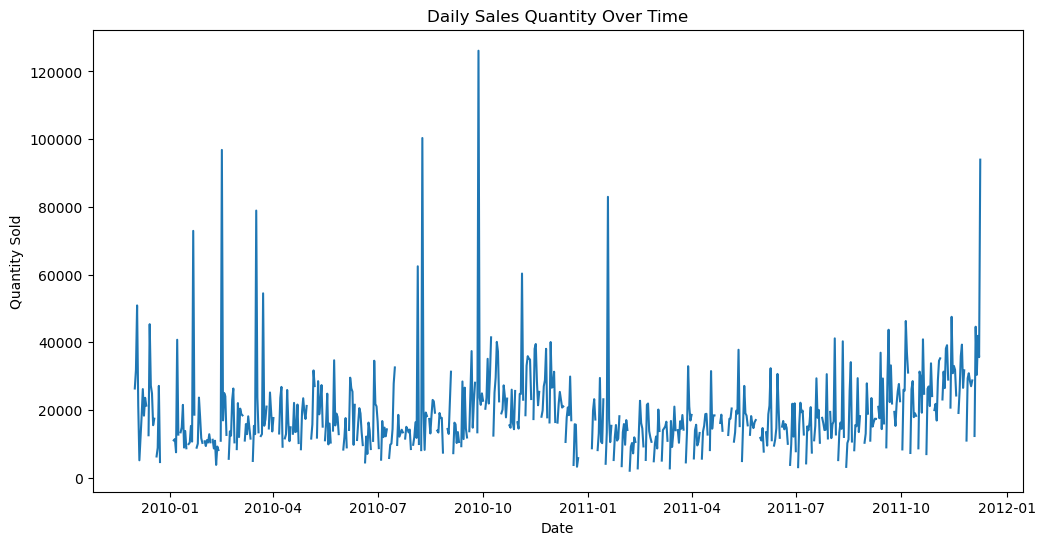

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sales)
plt.title('Daily Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# ✅ Save before showing
plt.savefig("daily_sales_plot.png", dpi=300, bbox_inches='tight')
plt.show()



In [49]:
daily_sales = daily_sales.fillna(0)


# arima

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [54]:
train = daily_sales.iloc[:-30]
test = daily_sales.iloc[-30:]

In [55]:
# ARIMA model
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()

# Forecast next 30 days
arima_forecast = arima_fit.forecast(steps=30)


# persorfimg sesonal ARIMA as in eda we notice a spike in sales at the end of the year

In [56]:
# SARIMA model
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast next 30 days
sarima_forecast = sarima_fit.forecast(steps=30)


comparing both arima and sarima

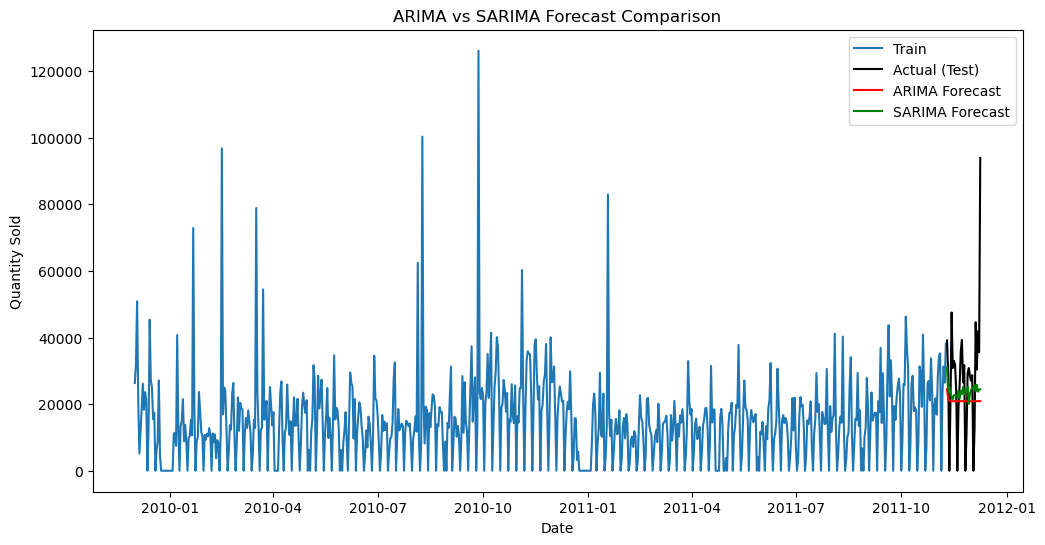

In [58]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual (Test)', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title("ARIMA vs SARIMA Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.legend()
plt.savefig("ARIMA vs SARIMA Forecast Comparison", dpi=300, bbox_inches='tight')
plt.show()


# model accurqacy 

In [59]:
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))

print(f"ARIMA RMSE:  {arima_rmse:.2f}")
print(f"SARIMA RMSE: {sarima_rmse:.2f}")

if sarima_rmse < arima_rmse:
    print("✅ SARIMA performs better (captures seasonality).")
else:
    print("✅ ARIMA performs better (simpler structure fits this data).")


ARIMA RMSE:  19146.00
SARIMA RMSE: 18369.15
✅ SARIMA performs better (captures seasonality).


In [60]:
comparison_df = pd.DataFrame({
    'Actual': test,
    'ARIMA_Forecast': arima_forecast,
    'SARIMA_Forecast': sarima_forecast
})
comparison_df.to_excel("ARIMA_SARIMA_comparison.xlsx")


refining the model

In [62]:
from statsmodels.tsa.stattools import adfuller
import pickle

def test_sarima(order, seasonal_order):
    model = SARIMAX(daily_sales, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    result = model.fit(disp=False)
    return result.aic, result

print("Testing seasonality options...")

order = (1,1,1)
weekly_aic, weekly_model = test_sarima(order, (1,1,1,7))
monthly_aic, monthly_model = test_sarima(order, (1,1,1,30))

print(f"Weekly SARIMA AIC:  {weekly_aic}")
print(f"Monthly SARIMA AIC: {monthly_aic}")

if weekly_aic < monthly_aic:
    best_model = weekly_model
    best_m = 7
    print("✅ Selected Weekly Seasonality (m=7)")
else:
    best_model = monthly_model
    best_m = 30
    print("✅ Selected Monthly Seasonality (m=30)")







Testing seasonality options...
Weekly SARIMA AIC:  15601.415310376517
Monthly SARIMA AIC: 14950.14677772955
✅ Selected Monthly Seasonality (m=30)


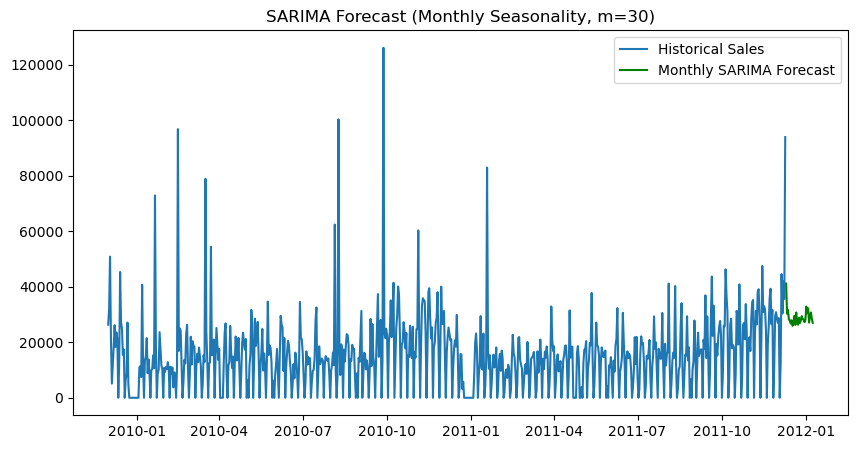

In [64]:
# Forecast next 30 days using the chosen monthly model
forecast = monthly_model.forecast(steps=30)
forecast_index = pd.date_range(daily_sales.index[-1], periods=31, freq='D')[1:]

plt.figure(figsize=(10,5))
plt.plot(daily_sales, label="Historical Sales")
plt.plot(forecast_index, forecast, color='green', label="Monthly SARIMA Forecast")
plt.title("SARIMA Forecast (Monthly Seasonality, m=30)")
plt.legend()
plt.savefig("SARIMA Monthly Forecast ", dpi=300, bbox_inches='tight')
plt.show()



#pickiling of model


In [66]:
import pickle

with open('sarima_monthly_sales_model.pkl', 'wb') as f:
    pickle.dump(monthly_model, f)

print("Model saved as 'sarima_monthly_sales_model.pkl' (m=30)")


Model saved as 'sarima_monthly_sales_model.pkl' (m=30)


In [68]:
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Predicted_Sales': forecast
})
forecast_df.to_csv('sarima_monthly_forecast.csv', index=False)

print("Forecast saved as 'sarima_monthly_forecast.csv'")


Forecast saved as 'sarima_monthly_forecast.csv'
